In [72]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [73]:
coin_Aave = pd.read_csv('coin_Aave.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_Bitcoin = pd.read_csv('coin_Bitcoin.csv')
coin_Cardano = pd.read_csv('coin_Cardano.csv')
coin_ChainLink = pd.read_csv('coin_ChainLink.csv')
coin_Cosmos = pd.read_csv('coin_Cosmos.csv')
coin_CryptocomCoin = pd.read_csv('coin_CryptocomCoin.csv')
coin_Dogecoin = pd.read_csv('coin_Dogecoin.csv')
coin_EOS = pd.read_csv('coin_EOS.csv')
coin_Ethereum = pd.read_csv('coin_Ethereum.csv')
coin_Iota = pd.read_csv('coin_Iota.csv')
coin_Litecoin = pd.read_csv('coin_Litecoin.csv')
coin_Monero = pd.read_csv('coin_Monero.csv')
coin_NEM = pd.read_csv('coin_NEM.csv')
coin_Polkadot = pd.read_csv('coin_Polkadot.csv')
coin_Solana = pd.read_csv('coin_Solana.csv')
coin_Stellar = pd.read_csv('coin_Stellar.csv')
coin_Tether = pd.read_csv('coin_Tether.csv')
coin_Tron = pd.read_csv('coin_Tron.csv')
coin_Uniswap = pd.read_csv('coin_Uniswap.csv')
coin_WrappedBitcoin = pd.read_csv('coin_WrappedBitcoin.csv')
coin_USDCoin = pd.read_csv('coin_USDCoin.csv')
coin_XRP = pd.read_csv('coin_XRP.csv')

In [74]:
coin_Bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


In [75]:
close_bitcoin = coin_Bitcoin['Close']
close_bitcoin[:5]

0    144.539993
1    139.000000
2    116.989998
3    105.209999
4     97.750000
Name: Close, dtype: float64

In [76]:
close_bitcoin = coin_Ethereum['Close']
close_bitcoin[:5]

0    0.753325
1    0.701897
2    0.708448
3    1.067860
4    1.217440
Name: Close, dtype: float64

### Please note, all of the below data came directly from this open source code which can be found here! We will not and should not use the code directly but it may be helpful in understanding what we will do!
https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency


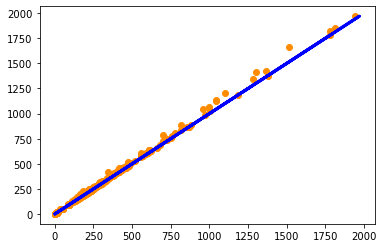

In [80]:
#This code was taken directly from 
# https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency/blob/master/Models/linear_regression.py
df = coin_Ethereum
msk = np.random.rand(len(df)) < 0.8

X = df["Open"]
Y = df["High"]
X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

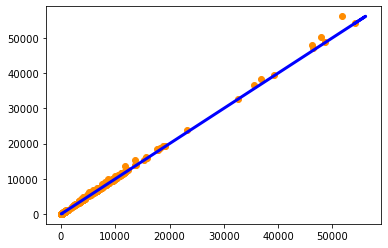

In [81]:
df = coin_Bitcoin
msk = np.random.rand(len(df)) < 0.8

X = df["Open"]
Y = df["High"]
X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

### Please note, all of the below data came directly from this open source code which can be found here! We will not and should not use the code directly but it may be helpful in understanding what we will do!

This code does NOT work without the trained data!

https://github.com/shawnrajan7/Bayesian-Regression-and-Bitcoin/blob/master/bitcoin.py

In [83]:
import statsmodels.formula.api as smf
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import math
import sys

# The path to the data folder should be given as input
if len(sys.argv) != 2:
    print('bitcoin.py <path to data folder>')
    sys.exit(1)
data_path = sys.argv[1]


# Reading the vectors from the given csv files
train1_90 = pd.read_csv(data_path+'/train1_90.csv')
train1_180 = pd.read_csv(data_path+'/train1_180.csv')
train1_360 = pd.read_csv(data_path+'/train1_360.csv')

train2_90 = pd.read_csv(data_path+'/train2_90.csv')
train2_180 = pd.read_csv(data_path+'/train2_180.csv')
train2_360 = pd.read_csv(data_path+'/train2_360.csv')

test_90 = pd.read_csv(data_path+'/test_90.csv')
test_180 = pd.read_csv(data_path+'/test_180.csv')
test_360 = pd.read_csv(data_path+'/test_360.csv')

#Function to calculate the similarity of two vectors
def similarity(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    nr = np.dot(a - a_mean,b - b_mean)
    dr = len(a) * np.std(a) * np.std(b)
    similarity = nr/dr
    return similarity


def computeDelta(wt, X, Xi):
    """
    This function computes equation 6 of the paper, but with the euclidean distance 
    replaced by the similarity function given in Equation 9.
    Parameters
    ----------
    wt : int
        This is the constant c at the top of the right column on page 4.
    X : A row of Panda Dataframe
        Corresponds to (x, y) in Equation 6.
    Xi : Panda Dataframe
        Corresponds to a dataframe of (xi, yi) in Equation 6.
    Returns
    -------
    float
        The output of equation 6, a prediction of the average price change.
    """
    similarity_vector = Xi.iloc[:,:-1].apply(lambda x : similarity(x,X[:-1]),axis = 1)
    similarity_exp = np.exp(wt * similarity_vector)
    price_change = np.dot(Xi.iloc[:,-1],similarity_exp)/np.sum(similarity_exp)
    return price_change



# Perform the Bayesian Regression to predict the average price change for each dataset of train2 using train1 as input. 
# These will be used to estimate the coefficients (w0, w1, w2, and w3) in equation 8.
weight = 2  # This constant was not specified in the paper, but we will use 2.
trainDeltaP90 = np.empty(0)
trainDeltaP180 = np.empty(0)
trainDeltaP360 = np.empty(0)
for i in range(0,len(train1_90.index)) :
  trainDeltaP90 = np.append(trainDeltaP90, computeDelta(weight,train2_90.iloc[i],train1_90))
for i in range(0,len(train1_180.index)) :
  trainDeltaP180 = np.append(trainDeltaP180, computeDelta(weight,train2_180.iloc[i],train1_180))
for i in range(0,len(train1_360.index)) :
  trainDeltaP360 = np.append(trainDeltaP360, computeDelta(weight,train2_360.iloc[i],train1_360))


# Actual deltaP values for the train2 data.
trainDeltaP = np.asarray(train2_360[['Yi']])
trainDeltaP = np.reshape(trainDeltaP, -1)


# Combine all the training data
d = {'deltaP': trainDeltaP,
     'deltaP90': trainDeltaP90,
     'deltaP180': trainDeltaP180,
     'deltaP360': trainDeltaP360 }
trainData = pd.DataFrame(d)


# Feed the data: [deltaP, deltaP90, deltaP180, deltaP360] to train the linear model. 
# Use the statsmodels ols function.
# Use the variable name model for your fitted model
model = smf.ols(formula = 'deltaP ~ deltaP90 + deltaP180 + deltaP360',data = trainData).fit()

# Print the weights from the model
print(model.params)


# Perform the Bayesian Regression to predict the average price change for each dataset of test using train1 as input.
# This should be similar to above where it was computed for train2.
testDeltaP90 = np.empty(0)
testDeltaP180 = np.empty(0)
testDeltaP360 = np.empty(0)
for i in range(0,len(train1_90.index)) :
  testDeltaP90 = np.append(testDeltaP90, computeDelta(weight,test_90.iloc[i],train1_90))
for i in range(0,len(train1_180.index)) :
  testDeltaP180 = np.append(testDeltaP180, computeDelta(weight,test_180.iloc[i],train1_180))
for i in range(0,len(train1_360.index)) :
  testDeltaP360 = np.append(testDeltaP360, computeDelta(weight,test_360.iloc[i],train1_360))


# Actual deltaP values for test data.
testDeltaP = np.asarray(test_360[['Yi']])
testDeltaP = np.reshape(testDeltaP, -1)


# Combine all the test data
d = {'deltaP': testDeltaP,
     'deltaP90': testDeltaP90,
     'deltaP180': testDeltaP180,
     'deltaP360': testDeltaP360}
testData = pd.DataFrame(d)


# Predict price variation on the test data set.
result = model.predict(testData)
compare = { 'Actual': testDeltaP,
            'Predicted': result }
compareDF = pd.DataFrame(compare)


# Compute the MSE and print the result
MSE = 0.0
MSE = sm.mean_squared_error(y_true=testDeltaP,y_pred=result)
print("The MSE is %f" % (MSE))


bitcoin.py <path to data folder>


SystemExit: 1

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
